In [1]:
#Importing the libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df=pd.read_csv("telecom_churn.csv")

In [3]:
df.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Random Numbers from Uniform Distribution,Train_Test_Split
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,0.31,Training
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.84,Testing
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.24,Training
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,0.10,Training
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,0.21,Training


In [4]:
df.dtypes

state                                          object
account length                                  int64
area code                                       int64
international plan                             object
voice mail plan                                object
number vmail messages                           int64
total day minutes                             float64
total day calls                                 int64
total day charge                              float64
total eve minutes                             float64
total eve calls                                 int64
total eve charge                              float64
total night minutes                           float64
total night calls                               int64
total night charge                            float64
total intl minutes                            float64
total intl calls                                int64
total intl charge                             float64
customer service calls      

In [5]:
df.shape

(3333, 22)

In [6]:
df=df.drop(['area code'],axis=1)


In [7]:
df=df.drop(['Train_Test_Split'],axis=1)

In [8]:
df.head(5)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Random Numbers from Uniform Distribution
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.31
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.84
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.24
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0.10
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.21


In [9]:
X=df.drop(['churn'],axis=1)
Y=df['churn']

In [10]:
#Checking for missing values:
df.isnull().sum()

state                                         0
account length                                0
international plan                            0
voice mail plan                               0
number vmail messages                         0
total day minutes                             0
total day calls                               0
total day charge                              0
total eve minutes                             0
total eve calls                               0
total eve charge                              0
total night minutes                           0
total night calls                             0
total night charge                            0
total intl minutes                            0
total intl calls                              0
total intl charge                             0
customer service calls                        0
churn                                         0
 Random Numbers from Uniform Distribution     0
dtype: int64

In [11]:
chk=df.select_dtypes(include='object')
chk.dtypes


state                 object
international plan    object
voice mail plan       object
dtype: object

In [12]:
char_features=['state','international plan','voice mail plan']

In [13]:
X_char=pd.get_dummies(X[char_features])

In [14]:
X_num=df.drop(['state','international plan','voice mail plan'],axis=1)

In [15]:
X_all=pd.concat([X_num,X_char],axis=1,join="inner")

In [16]:
X=X_all.drop(['churn'],axis=1)

In [17]:
X.shape

(3333, 71)

In [18]:
X.head(5)

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,1,1,0


In [19]:
from sklearn.feature_selection import VarianceThreshold
varcutoff=VarianceThreshold()
X=pd.DataFrame(varcutoff.fit_transform(X),index=X.index,columns=X.columns)
X.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,...,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.903090,0.096910,0.723372,0.276628
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,...,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.295879,0.295879,0.447398,0.447398
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [21]:
X=X.apply(lambda x: outlier_capping(x))
X.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.981362,8.074707,179.792499,100.482748,30.565254,201.000852,100.129913,17.085312,200.791174,100.110447,...,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.903090,0.096910,0.723372,0.276628
std,39.276205,13.622222,53.535083,19.628346,9.100850,49.821440,19.546408,4.234920,49.519955,19.223828,...,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.295879,0.295879,0.447398,0.447398
min,12.320000,0.000000,51.832000,54.000000,8.813200,79.524000,53.000000,6.759200,79.428000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,195.000000,43.000000,305.168000,146.000000,51.876800,318.936000,147.000000,27.113600,317.448000,146.680000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,Y, test_size=0.3,random_state=42)

In [23]:
X_test.shape

(1000, 71)

In [24]:
X_train.shape

(2333, 71)

In [25]:
y_train.shape

(2333,)

In [26]:
y_test.shape

(1000,)

In [27]:
y_train.mean()

0.14573510501500214

In [28]:
y_test.mean()

0.143

In [29]:
#Buliding the gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [32]:
y_pred=clf.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)


y_pred1=clf.predict(X)
y_pred_tree1=dtree.predict(X)
y_pred_rf1=rf.predict(X)



In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [34]:

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))
confusion_matrix(Y, y_pred1)

Accuracy: 0.951
Precision 0.9433962264150944
Recall 0.6993006993006993
f1_score 0.8032128514056224


array([[2838,   12],
       [ 104,  379]])

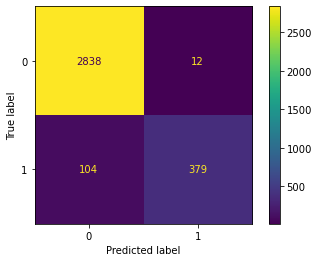

In [35]:
metrics.plot_confusion_matrix(clf,X,Y)

In [36]:
metrics.roc_auc_score(y_test,y_pred)

0.8461497662197779

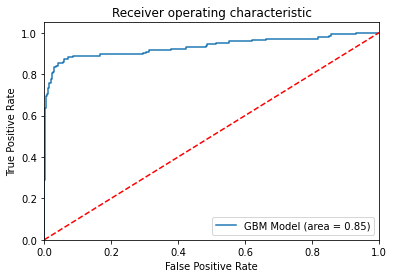

In [37]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tree_roc_auc=roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='GBM Model (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
y_pred_prob = clf.predict_proba(X)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_RF')['churn'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,334,0.994012,332.0,332.0,0.687371,0.687371,0.10021,0.10021,1,6.859300
1,9,333,0.330330,110.0,442.0,0.227743,0.915114,0.09991,0.20012,2,4.572825
2,8,333,0.024024,8.0,450.0,0.016563,0.931677,0.09991,0.30003,3,3.105280
3,7,333,0.024024,8.0,458.0,0.016563,0.948240,0.09991,0.39994,4,2.370956
4,6,333,0.027027,9.0,467.0,0.018634,0.966874,0.09991,0.49985,5,1.934328
5,5,334,0.017964,6.0,473.0,0.012422,0.979296,0.10021,0.60006,6,1.631997
6,4,333,0.015015,5.0,478.0,0.010352,0.989648,0.09991,0.69997,7,1.413844
7,3,333,0.003003,1.0,479.0,0.002070,0.991718,0.09991,0.79988,8,1.239834
8,2,333,0.009009,3.0,482.0,0.006211,0.997930,0.09991,0.89979,9,1.109069
9,1,334,0.002994,1.0,483.0,0.002070,1.000000,0.10021,1.00000,10,1.000000


In [39]:
#Decision tree:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
y_pred_tree=dtree.predict(X_test)

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))
confusion_matrix(Y, y_pred_tree1)

Accuracy: 0.909
Precision 0.6733333333333333
Recall 0.7062937062937062
f1_score 0.689419795221843


array([[2801,   49],
       [  42,  441]])

In [42]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))
confusion_matrix(Y, y_pred_rf1)

Accuracy: 0.94
Precision 0.9882352941176471
Recall 0.5874125874125874
f1_score 0.7368421052631577


array([[2849,    1],
       [  59,  424]])